# Tennis Ball

This tutorial proposes options to find a tennis ball in a picture using two different techniques. This will also play with parameters, to show how to avoid finding false positive, i.e objects that are nowhere near the one we are looking for.

First, let's load the image that will be the base for our image finding exercice.

In [22]:
(ns divine-briars
  (:require
    [opencv4.utils :as u]
    [opencv4.colors.rgb :as color]
    [opencv4.core :refer :all]))

nil

In [23]:
; if jupyter notebook is running locally and you have a webcam plugged in
; un comment the below
; (u/simple-cam-window identity)

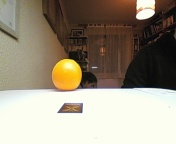

In [24]:
(def img (-> "resources/chapter04/orange_on_table.png" imread (u/resize-by 0.5)))
(u/>>> img)

## Using Hough Circles

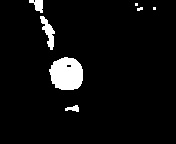

In [25]:
(def hsv (-> img clone (cvt-color! COLOR_RGB2HSV)))
(def thresh-image (new-mat))
(in-range hsv (new-scalar 70 100 100) (new-scalar 103 255 255) thresh-image)

(dotimes [_ 1]
 (dilate! thresh-image (new-mat)))

; the ball is here
(u/>>> thresh-image)

In [26]:
(def circles (new-mat))
(def minRadius 10)
(def maxRadius 50)
(hough-circles thresh-image circles CV_HOUGH_GRADIENT 1 minRadius 120 15 minRadius maxRadius)

(println circles)

#object[org.opencv.core.Mat 0x402b5678 Mat [ 1*1*CV_32FC3, isCont=true, isSubmat=false, nativeObj=0x7fe250219310, dataAddr=0x7fe250207f40 ]]


nil

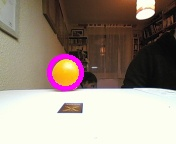

In [27]:
(def output (clone img))
(dotimes [i (.cols circles)]
  (let [ circle (.get circles 0 i) x (nth circle 0) y (nth circle 1) r (nth circle 2)  p (new-point x y)]
  (opencv4.core/circle output p (int r) color/magenta 3)))

(u/>>> output)

In [28]:
(defn my-orange! [img] 
  (u/resize-by img 0.5)
  (let [ hsv (-> img clone (cvt-color! COLOR_RGB2HSV)) 
         thresh-image (new-mat)
   		 circles (new-mat)
		 minRadius 30
		 maxRadius 70
		 output (clone img)
        ]
    
(in-range hsv (new-scalar 70 100 100) (new-scalar 103 255 255) thresh-image)
(dotimes [_ 1]
 (dilate! thresh-image (new-mat)))
(hough-circles thresh-image circles CV_HOUGH_GRADIENT 1 minRadius 120 15 minRadius maxRadius)

(dotimes [i (.cols circles)]
  (let [ circle (.get circles 0 0) x (nth circle 0) y (nth circle 1) r (nth circle 2)  p (new-point x y)]
  (opencv4.core/circle output p (int r) color/magenta 3))
    )
output))

#'divine-briars/my-orange!

In [29]:
; (u/simple-cam-window my-orange!)

## Method2: Using Find Contours

Find object with find contours gives less chance to parameters, the **find-contours** function from core does pretty much all for us.

In [30]:
(defn find-my-orange! [img ]
  
 (let[ hsv (-> img clone (cvt-color! COLOR_RGB2HSV))
	  thresh-image (new-mat)
      contours (new-arraylist)
      output (clone img)]
  
(in-range hsv (new-scalar 70 100 100) (new-scalar 103 255 255) thresh-image)
  
(find-contours 
  thresh-image 
  contours 
  (new-mat)  ; mask
  RETR_LIST 
  CHAIN_APPROX_SIMPLE)
  
(dotimes [ci (.size contours)]
 (if (> (contour-area (.get contours ci)) 100 )
  (draw-contours output contours ci color/pink-1 FILLED)))
  
  output
  ))

#'divine-briars/find-my-orange!

In [31]:
; if jupyter notebook is running locally and you have a webcam plugged in
; un comment the below
; (u/simple-cam-window find-my-orange!)